Learning curve for linear regression with polynomial features


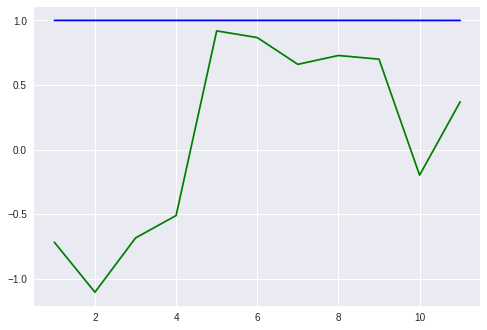

Polynomial fit


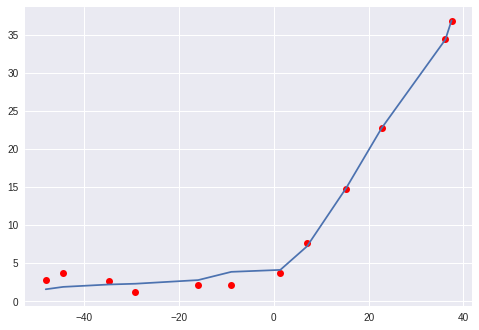

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.io as sio
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import scipy.optimize as opt

data_feat = sio.loadmat('diagnostics-data.mat')

# training and validation sets

x_train = data_feat['X']
y_train = data_feat['y']

x_val = data_feat['Xval']
y_val = data_feat['yval']

x_train_f = x_train.flatten()
y_train_f = y_train.flatten()

score_train = []
score_val = []

# Ridge

for i in range(1, x_train.size):

  clf = Ridge(alpha=0)
  clf.fit(x_train[0:i,:], y_train[0:i,:]) 
  sc_tr = clf.score(x_train[0:i,:], y_train[0:i,:])
  sc_val = clf.score(x_val, y_val)
  score_train.append(sc_tr)
  score_val.append(sc_val)

sc_train = []
sc_val = []

# Generating learning curve data

for i in range(1,x_train.size):
  poly = PolynomialFeatures(degree=8)
  x_poly = poly.fit_transform(x_train[0:i,:])
  v_poly = poly.fit_transform(x_val)
  reg = LinearRegression(normalize=True).fit(x_poly[0:i,:], y_train[0:i,:])
  s_tr = reg.score(x_poly[0:i,:], y_train[0:i,:])
  s_val = reg.score(v_poly, y_val)

  sc_train.append(s_tr)
  sc_val.append(s_val)

print('Learning curve for linear regression with polynomial features')
plt.plot(range(1,x_train.size), sc_val, 'green')
plt.plot(range(1, x_train.size), sc_train,'blue')
plt.show()

# Fitting linear regression with polynomial features

pol = PolynomialFeatures(degree=8)
x_pol = pol.fit_transform(x_train)
v_pol = poly.fit_transform(x_val)
regu = LinearRegression(normalize=True).fit(x_pol, y_train)
y_mas = regu.predict(pol.transform(x_train))

temp = np.array([x_train,y_mas])
temp.sort(1)
x = temp[0,:]
y = temp[1,:]

print('Polynomial fit')
plt.plot([x_train_f], [y_train_f],'ro')
plt.plot(x, y)
plt.show()